<a href="https://colab.research.google.com/github/pmukeshreddy/car-predication/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
from sklearn.linear_model import Lasso

In [ ]:
car_data=pd.read_csv("car data.csv")

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
print(car_data["Fuel_Type"].value_counts())
print(car_data["Seller_Type"].value_counts())
print(car_data["Transmission"].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_data.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}},inplace=True)
car_data.replace({'Transmission': {'Manual': 0, 'Automatic': 1}},inplace=True)



In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
x = car_data.drop(columns=["Car_Name","Selling_Price"],axis=1)
y = car_data["Selling_Price"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

linerarRegression

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
training_data_pridication = model.predict(x_train)
r2_score(y_train,training_data_pridication)

0.8839793496750795

Text(0.5, 1.0, 'acutal price vs pridicates price')

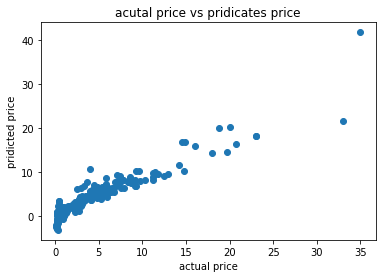

In [ ]:
plt.scatter(y_train,training_data_pridication)
plt.xlabel("actual price")
plt.ylabel("pridicted price")
plt.title("acutal price vs pridicates price")

In [ ]:
test_pridication = model.predict(x_test)
r2_score(y_test,test_pridication)

0.8468053957654694

Text(0.5, 1.0, 'actual price vs pridicated pric')

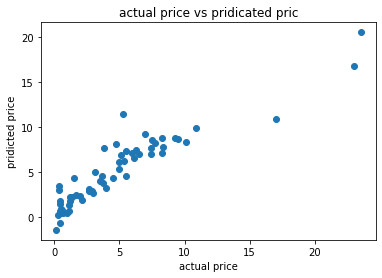

In [ ]:
plt.scatter(y_test,test_pridication)
plt.xlabel("actual price")
plt.ylabel("pridicted price")
plt.title("actual price vs pridicated pric")

lasso regression

In [ ]:
lasso_reg = Lasso()
lasso_reg.fit(x_train,y_train)

Lasso()

training

In [ ]:
pridication_train = lasso_reg.predict(x_train)


In [ ]:
error_score = r2_score(y_train,pridication_train)
error_score

0.8480302868137167

Text(0.5, 1.0, 'actual price vs pridiaction price')

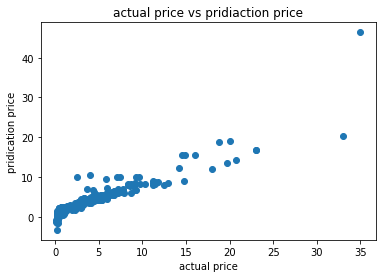

In [ ]:
plt.scatter(y_train,pridication_train)
plt.xlabel("actual price")
plt.ylabel("pridication price")
plt.title("actual price vs pridiaction price")

In [ ]:
test_pridaction=lasso_reg.predict(x_test)

In [ ]:
error_score = r2_score(y_test,test_pridication)
error_score

0.8468053957654694

Text(0.5, 1.0, 'actual vs pridicated')

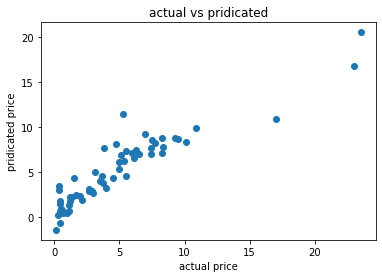

In [ ]:
plt.scatter(y_test, test_pridication)
plt.xlabel("actual price")
plt.ylabel("pridicated price")
plt.title("actual vs pridicated")
